In [262]:
#Numpy
import numpy as np

#pandas
import pandas as pd

#seaborn
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [263]:
#load dataset
df= pd.read_csv("C:/Users/DARSHA/jupyter samples/diabetes.csv")

In [264]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [265]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [266]:
df.sample(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
517,7,125,86,0,0,37.6,0.304,51,0
450,1,82,64,13,95,21.2,0.415,23,0
297,0,126,84,29,215,30.7,0.520,24,0
12,10,139,80,0,0,27.1,1.441,57,0
709,2,93,64,32,160,38.0,0.674,23,1
495,6,166,74,0,0,26.6,0.304,66,0


In [267]:
df.shape

(768, 9)

In [268]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [270]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In above table, the min value of columns "Glucose, BloodPressure, SkinThickness, Insulin, BMI" is zero(0). It is clear that this value can't be zero. So im going to impute mean values of these respective columns instead of zero.

In [272]:
df=df.drop_duplicates()

In [273]:
df.shape

(768, 9)

In [274]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [275]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

check the number of zero values in dataset

In [277]:
print('No. of zero values in Glucose',df[df['Glucose']==0].shape[0])

No. of zero values in Glucose 5


In [278]:
print('No. of zero values in BloodPressure',df[df['BloodPressure']==0].shape[0])

No. of zero values in BloodPressure 35


In [279]:
print('No. of zero values in SkinThickness',df[df['SkinThickness']==0].shape[0])

No. of zero values in SkinThickness 227


In [280]:
print('No. of zero values in Insulin',df[df['Insulin']==0].shape[0])

No. of zero values in Insulin 374


In [281]:
print('No. of zero values in BMI',df[df['BMI']==0].shape[0])

No. of zero values in BMI 11


Replace no. of zero values with mean of the columns

In [283]:
df['Glucose']= df['Glucose'].replace(0,df['Glucose'].mean())
print('No. of zero values in Glucose',df[df['Glucose']==0].shape[0])

No. of zero values in Glucose 0


In [284]:
df['BloodPressure']= df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']= df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']= df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']= df['BMI'].replace(0,df['BMI'].mean())


In [285]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


data visualization

Nagative (0): 500
Positive (1): 268


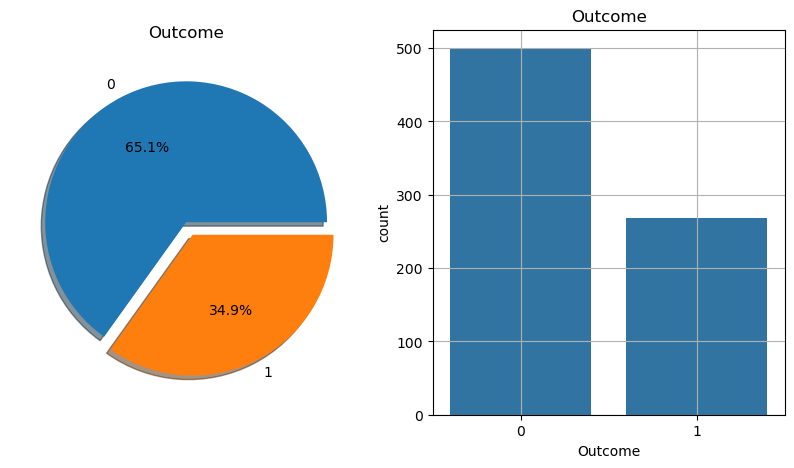

In [287]:
#outcome couet plot
f, ax=plt.subplots(1,2, figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, ax=ax[0])
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
N,P =df['Outcome'].value_counts()
print('Nagative (0):', N)
print('Positive (1):', P)
plt.grid()
plt.show()

histograms

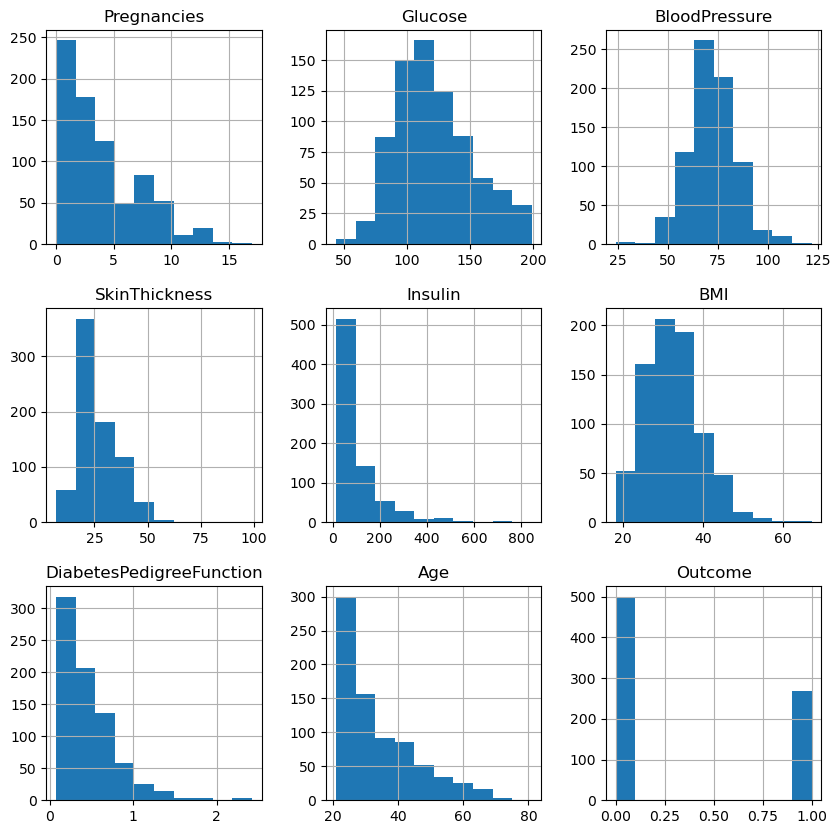

In [289]:
df.hist(bins=10, figsize=(10,10))
plt.show()

scatter plot

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

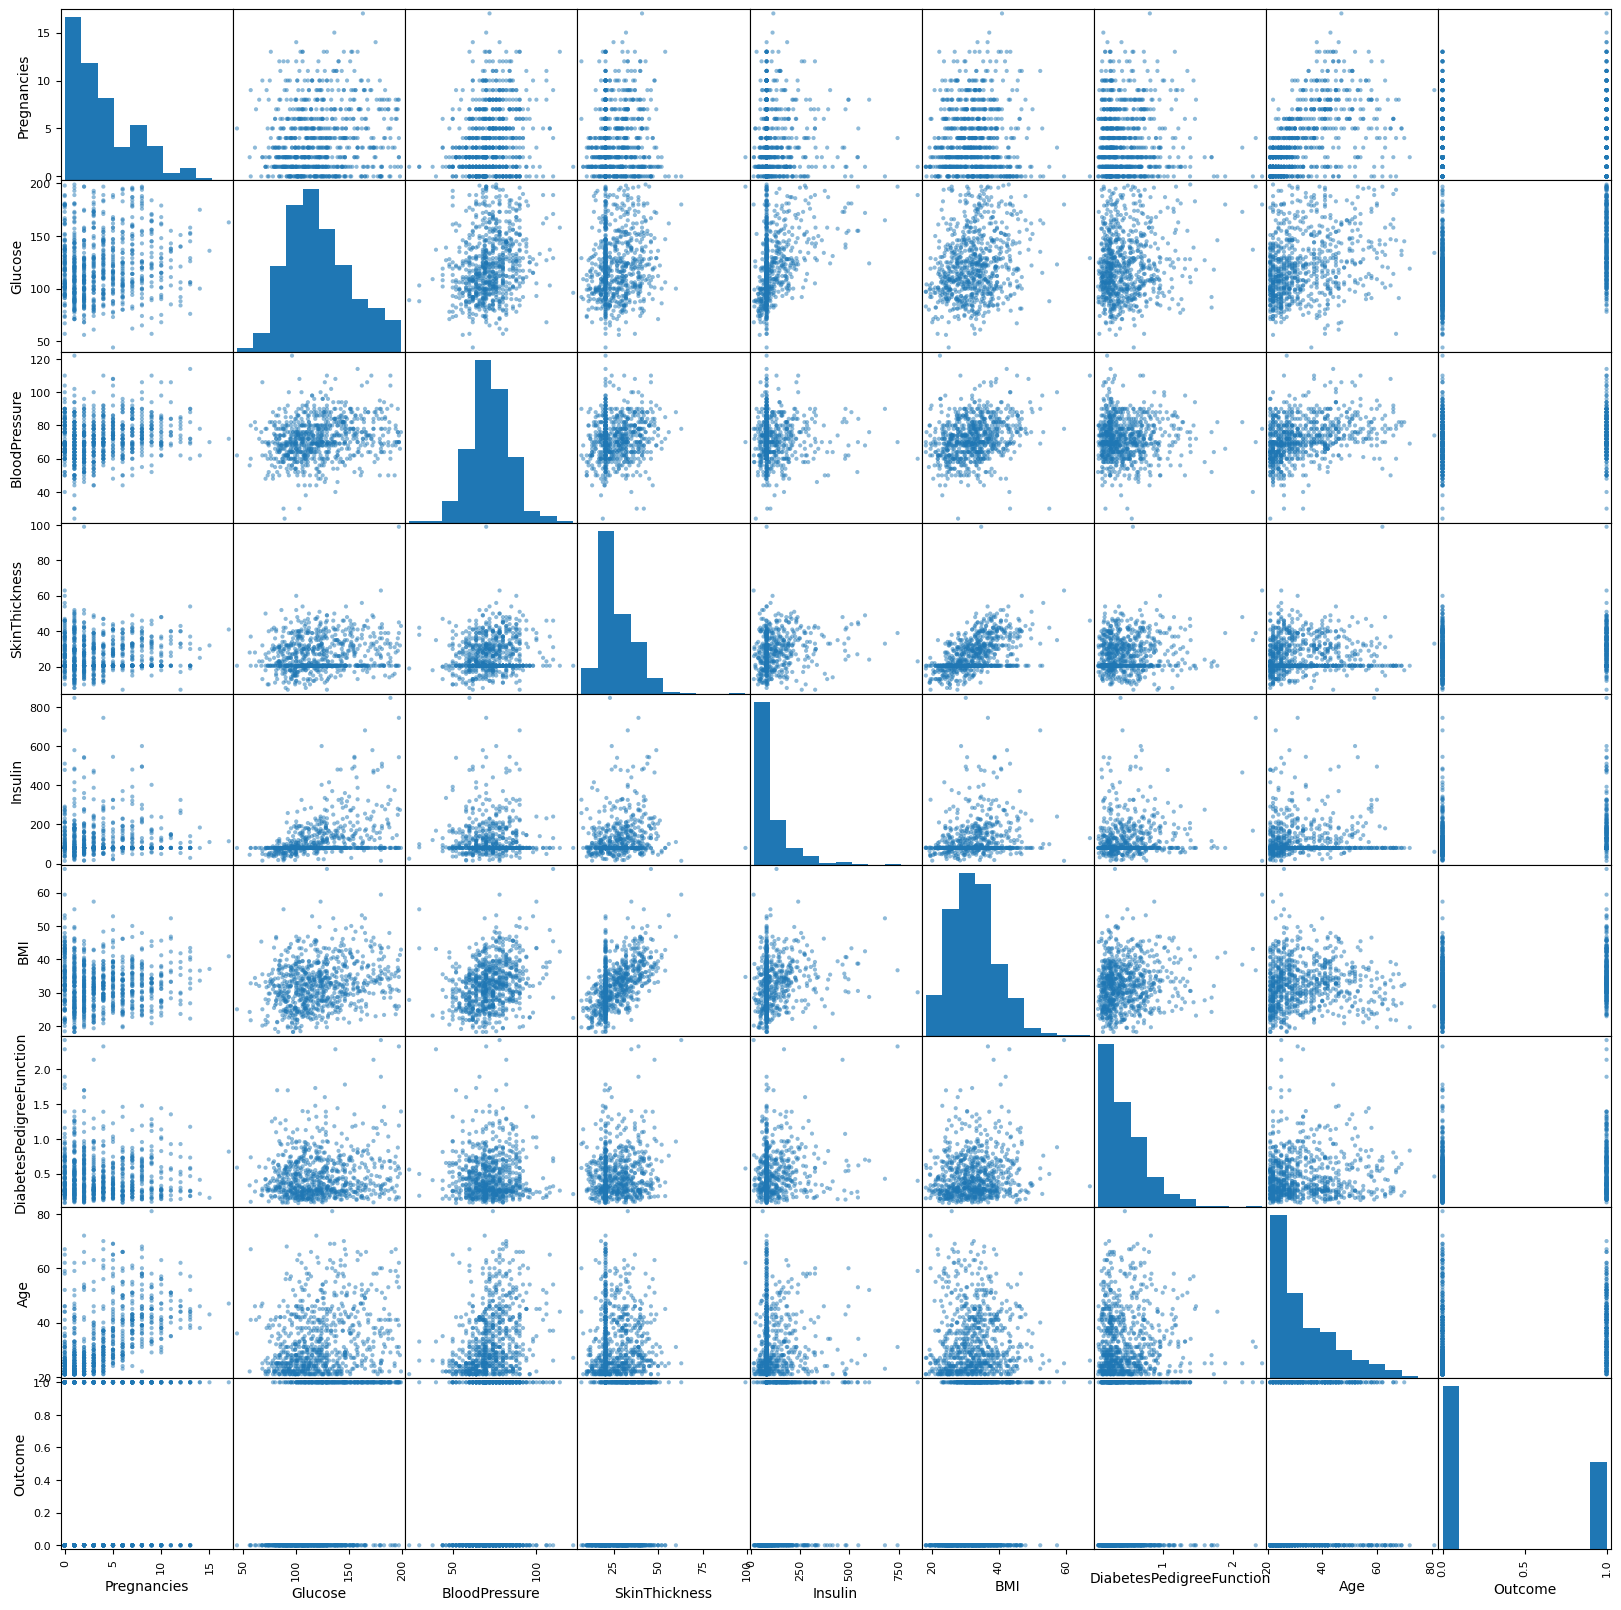

In [291]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize =(20,20))

pair plot

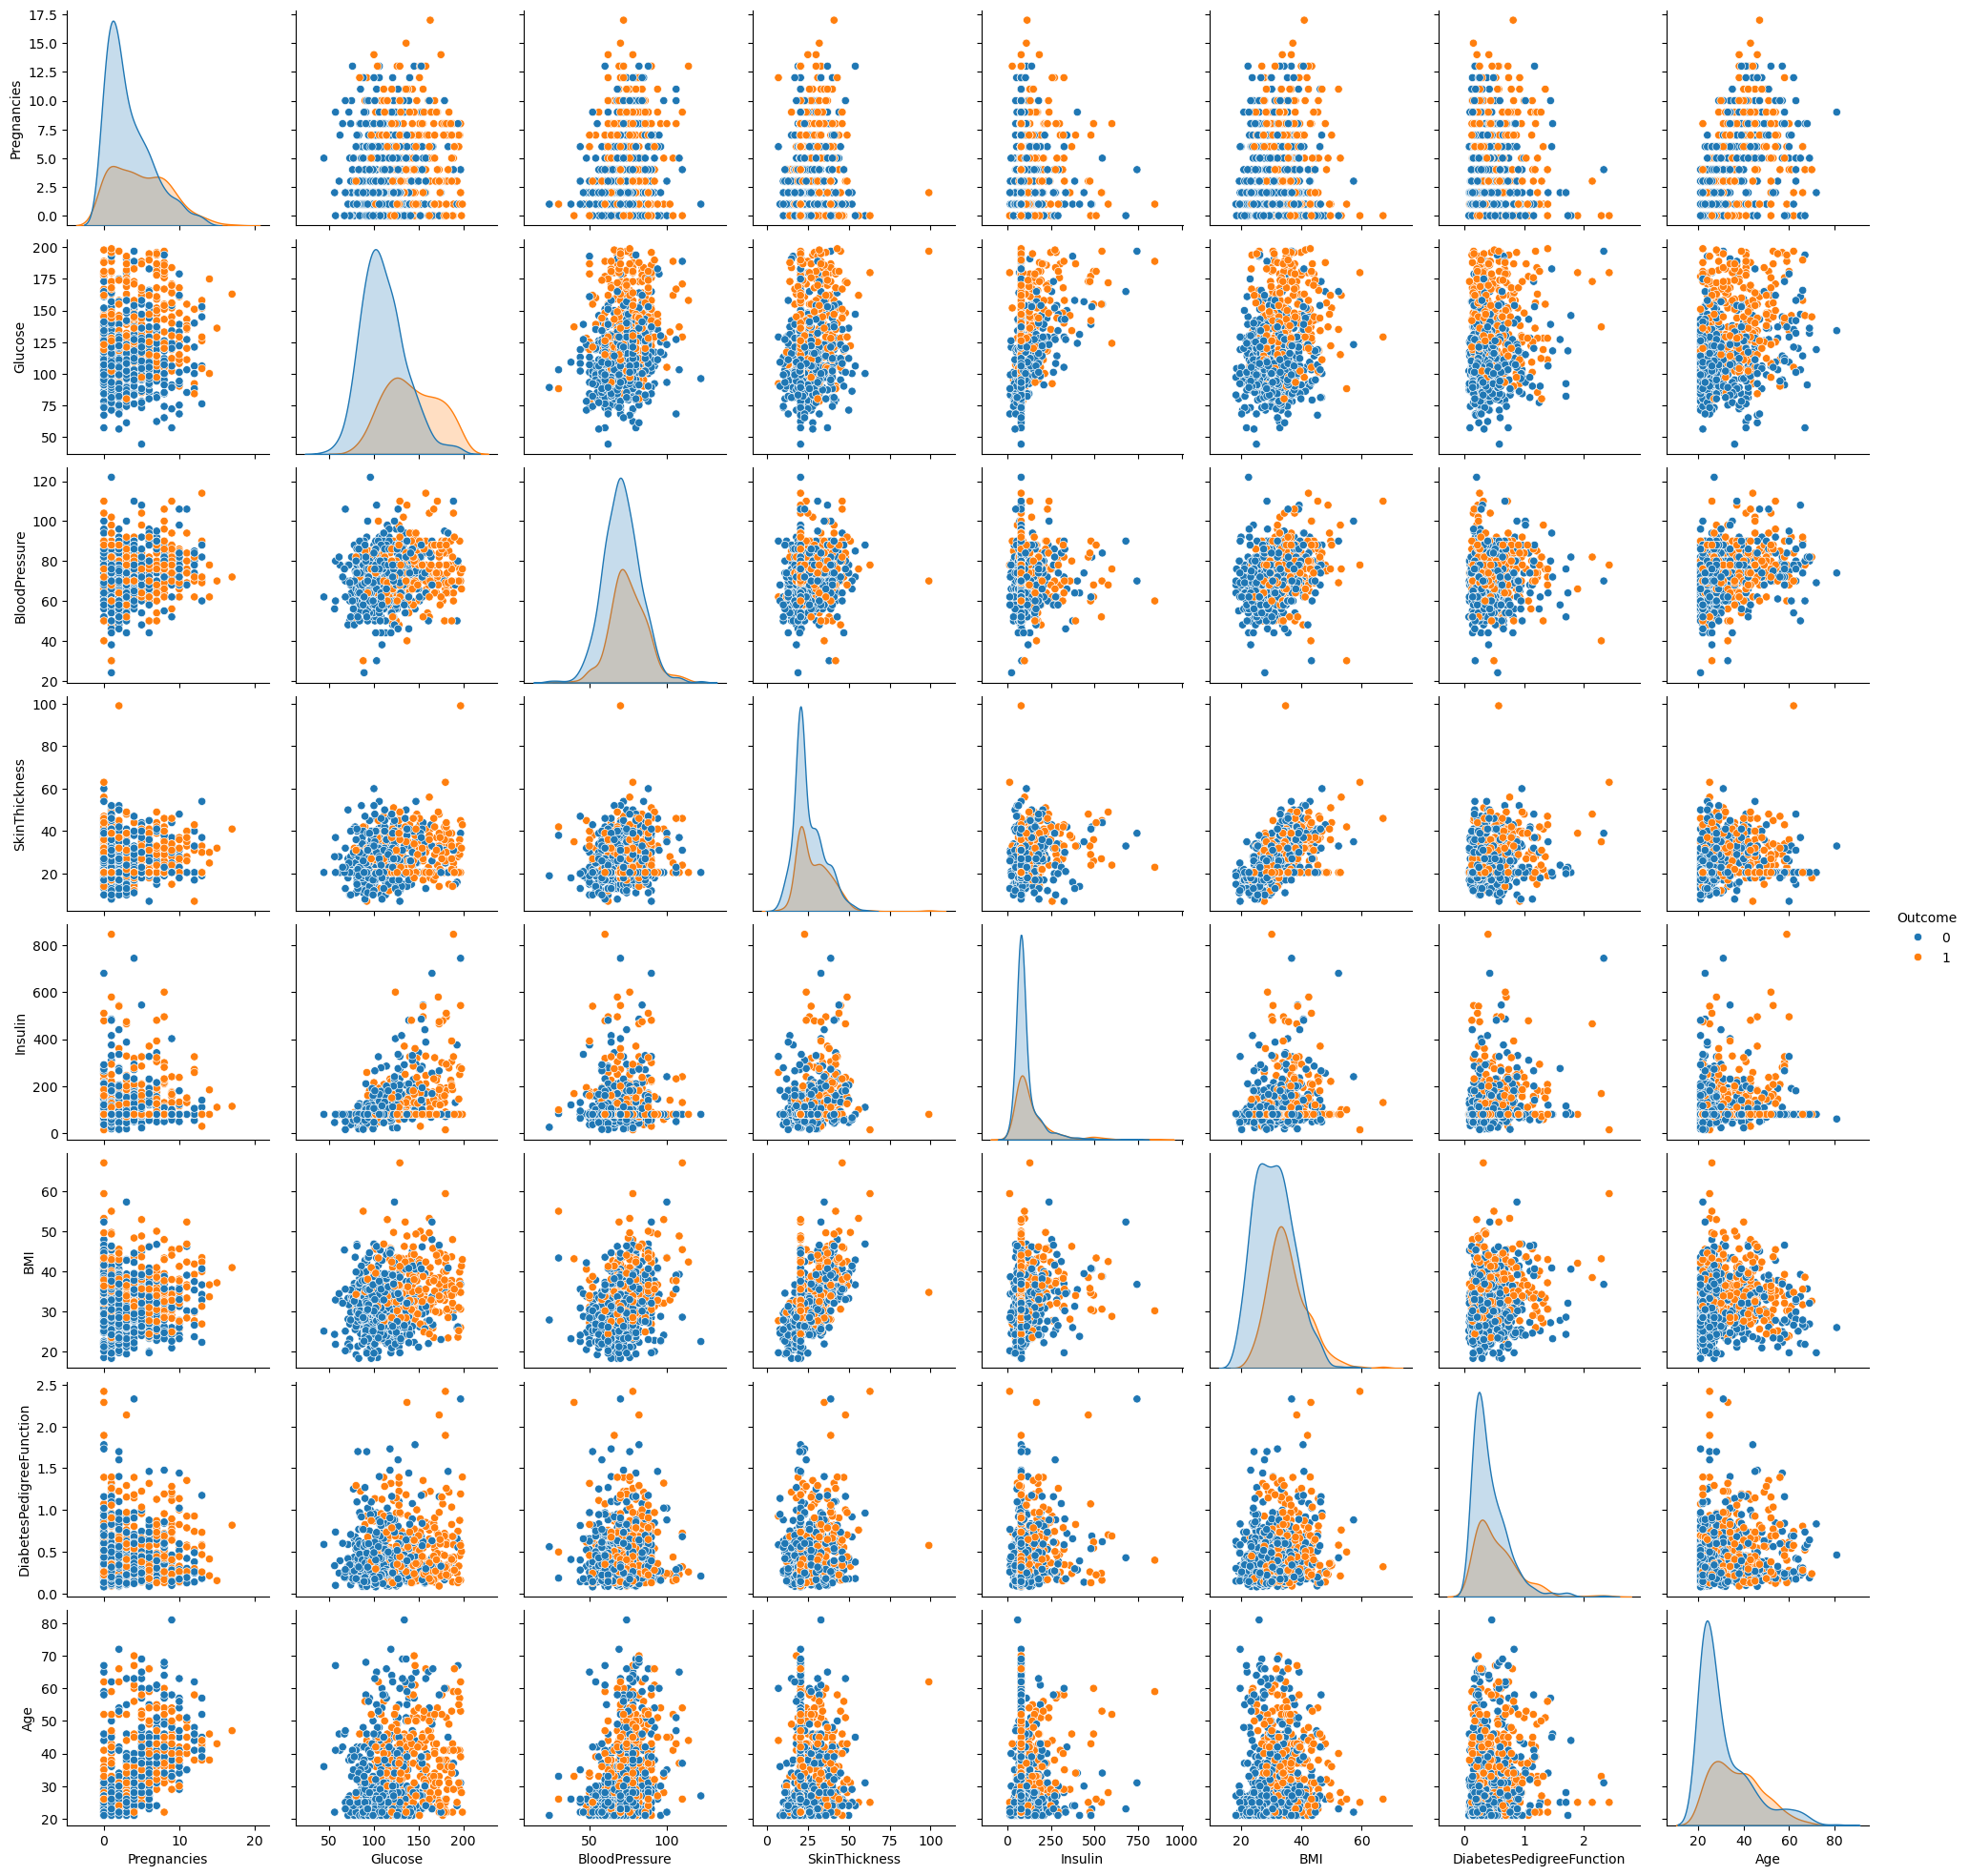

In [293]:
sns.pairplot(data=df, hue='Outcome')
plt.show()

correlation analysis

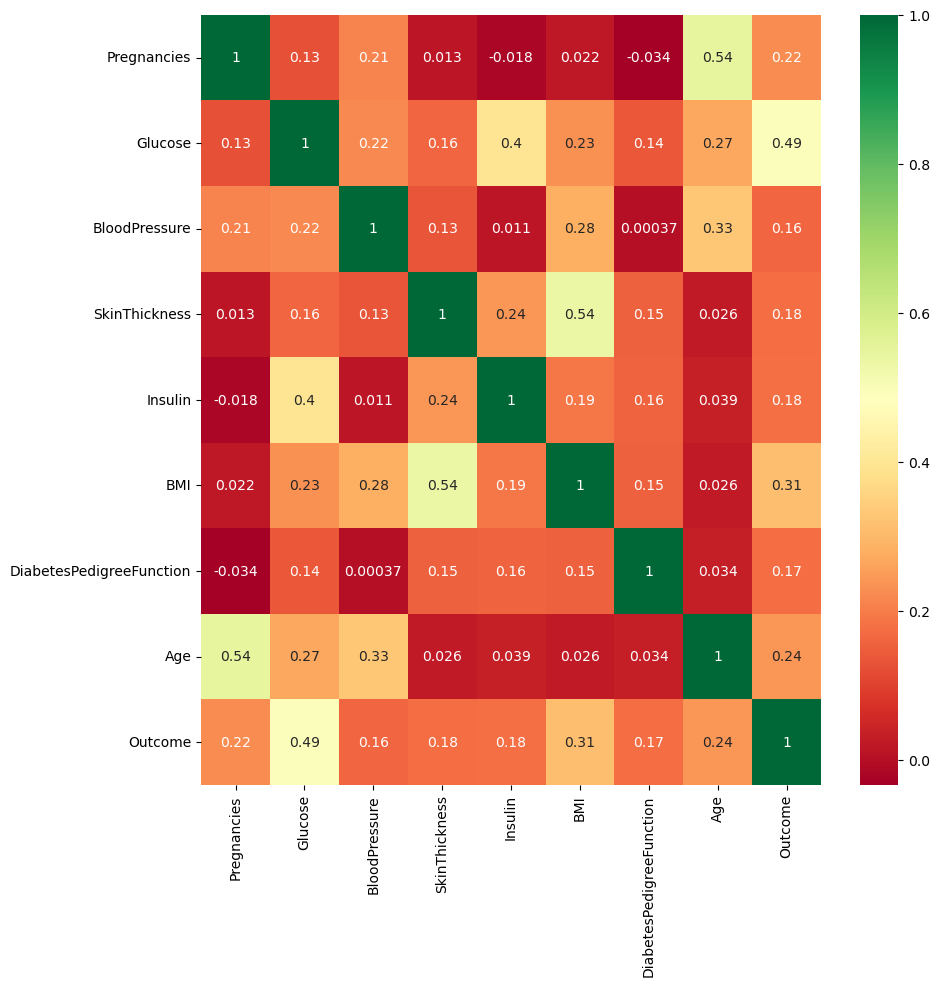

In [295]:
import seaborn as sns
#get correlations of each features in dataset
corrmat= df.corr()
top_corr_features =corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="RdYlGn")

From the correalation heat map, we can see that there is a high correlation between Outcome and [pregnancies, glucose,BMI,age,Insulin ] we can select these features to accept input from the user and predict the outcome.

split the data frame into X and Y

In [298]:
target_name ='Outcome'
y=df[target_name]
x=df.drop([target_name], axis=1)

In [299]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [300]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Apply feature scalling

In [302]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
SSX= scaler.transform(x)

train test split

In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(SSX,y,test_size=0.2, random_state=7)

In [305]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [306]:
X_test.shape,y_test.shape

((154, 8), (154,))

logistic regression

In [308]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver ='liblinear', multi_class ='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

KNeighborsClassifier (KNN)

In [310]:
from sklearn.neighbors import KNeighborsClassifier 
knn =KNeighborsClassifier() 
knn.fit(X_train, y_train)

KNeighborsClassifier()

naive bayes

In [312]:
from sklearn.naive_bayes import GaussianNB 
nb =GaussianNB() 
nb.fit(X_train, y_train)

GaussianNB()

Support Vector Machine

In [314]:
from sklearn.svm import SVC
sv =SVC() 
sv.fit(X_train, y_train)

SVC()

decision tree

In [316]:
from sklearn.tree import DecisionTreeClassifier 
dt =DecisionTreeClassifier() 
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Random Forest

In [318]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

making prediction

making the prediction on test data using lr

In [321]:
X_test.shape

(154, 8)

In [322]:
lr_pred= lr.predict(X_test)

In [323]:
lr_pred.shape

(154,)

making the prediction on test data using KNN

In [325]:
knn_pred=knn.predict(X_test)

making prediction on test by using naive bayes

In [327]:
nb_pred=nb.predict(X_test)

Making prection on test by using SVM

In [329]:
sv_pred=sv.predict(X_test)

making predict on test by using DT

In [331]:
dt_pred=dt.predict(X_test)

making predict on test by using DT

In [333]:
rf_pred=rf.predict(X_test)

Model evaluation

train score and test score

In [336]:
from sklearn.metrics import accuracy_score
print("Train Accuracy of logistic regression", lr.score(X_train, y_train)*100)
print("Accuracy (Test) score of logistic regression", lr.score(X_test, y_test)*100)
print("Accuracy (Test) score of logistic regression", accuracy_score(y_test, lr_pred)*100)

Train Accuracy of logistic regression 77.36156351791531
Accuracy (Test) score of logistic regression 77.27272727272727
Accuracy (Test) score of logistic regression 77.27272727272727


In [337]:
print("Train Accuracy of KNN", knn.score(X_train, y_train)*100)
print("Accuracy (Test) score of KNN", knn.score(X_test, y_test)*100)
print("Accuracy (Test) score of KNN", accuracy_score(y_test, knn_pred)*100)

Train Accuracy of KNN 81.10749185667753
Accuracy (Test) score of KNN 74.67532467532467
Accuracy (Test) score of KNN 74.67532467532467


In [338]:
print("Train Accuracy of naive bayes", nb.score(X_train, y_train)*100)
print("Accuracy (Test) score of naive bayes", nb.score(X_test, y_test)*100)
print("Accuracy (Test) score of naive bayes", accuracy_score(y_test, nb_pred)*100)

Train Accuracy of naive bayes 74.2671009771987
Accuracy (Test) score of naive bayes 74.02597402597402
Accuracy (Test) score of naive bayes 74.02597402597402


In [339]:
print("Train Accuracy of SVM", sv.score(X_train, y_train)*100)
print("Accuracy (Test) score of SVM", sv.score(X_test, y_test)*100)
print("Accuracy (Test) score of SVM", accuracy_score(y_test, sv_pred)*100)

Train Accuracy of SVM 81.92182410423453
Accuracy (Test) score of SVM 83.11688311688312
Accuracy (Test) score of SVM 83.11688311688312


In [340]:
print("Train Accuracy of Decision tree", dt.score(X_train, y_train)*100)
print("Accuracy (Test) score of DT", dt.score(X_test, y_test)*100)
print("Accuracy (Test) score of DT", accuracy_score(y_test, dt_pred)*100)

Train Accuracy of Decision tree 100.0
Accuracy (Test) score of DT 79.87012987012987
Accuracy (Test) score of DT 79.87012987012987


In [341]:
print("Train Accuracy of Random Forest", rf.score(X_train, y_train)*100)
print("Accuracy (Test) score of Random Forest", rf.score(X_test, y_test)*100)
print("Accuracy (Test) score of Random Forest", accuracy_score(y_test, rf_pred)*100)

Train Accuracy of Random Forest 100.0
Accuracy (Test) score of Random Forest 77.27272727272727
Accuracy (Test) score of Random Forest 77.27272727272727


confusion matrix

In [343]:
from sklearn.metrics import classification_report,confusion_matrix
#confusion matrix of logistic regression
cm=confusion_matrix(y_test,lr_pred)
cm

array([[86, 11],
       [24, 33]], dtype=int64)

<Axes: >

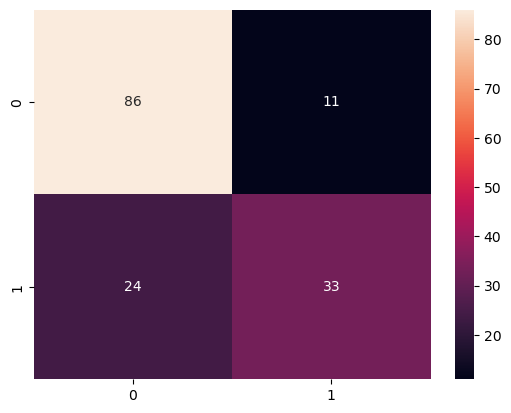

In [344]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True,fmt="d")

In [345]:
TN= cm[0,0]
FP= cm[0,1]
FN= cm[1,0]
TP= cm[1,1]

In [346]:
TN, FP, FN, TP

(86, 11, 24, 33)

In [347]:
#making the confusion matrix of logistic Regression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm=confusion_matrix(y_test, lr_pred)

In [348]:
# Print confusion matrix values
print('TN - True Negative:', format(cm[0, 0]))
print('FP - False Positive:', format(cm[0, 1]))
print('FN - False Negative:', format(cm[1, 0]))
print('TP - True Positive:', format(cm[1, 1]))

# Calculate accuracy rate
accuracy_rate = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print('Accuracy Rate: {:.2f}%'.format(accuracy_rate * 100))

# Calculate misclassification rate
misclassification_rate = (cm[0, 1] + cm[1, 0]) / np.sum(cm)
print('Misclassification Rate: {:.2f}%'.format(misclassification_rate * 100))


TN - True Negative: 86
FP - False Positive: 11
FN - False Negative: 24
TP - True Positive: 33
Accuracy Rate: 77.27%
Misclassification Rate: 22.73%


In [349]:
77.27+22.73

100.0

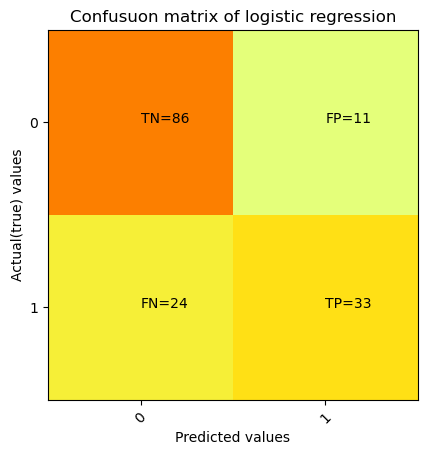

In [350]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames =['0','1']
plt.title('Confusuon matrix of logistic regression')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))
plt.show()

In [351]:
pd.crosstab(y_test, lr_pred, margins=False)

col_0,0,1
Outcome,,
0,86,11
1,24,33


In [352]:
pd.crosstab(y_test, lr_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,86,11,97
1,24,33,57
All,110,44,154


In [353]:
pd.crosstab(y_test, lr_pred, rownames= ['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,86,11,97
1,24,33,57
All,110,44,154


Precision (PPV-Positive Predictive Value)

Precision= TP(TP +FP)
where TP= True Positive
FP= False Positive

In [356]:
TP,FP

(33, 11)

In [357]:
Precision =TP/(TP+FP)
Precision

0.75

In [358]:
33/(33+11)

0.75

In [359]:
precision_score= TP/float(TP+FP)*100
print('Precision Score: (0:0:4f)',format(precision_score))

Precision Score: (0:0:4f) 75.0


In [360]:
from sklearn.metrics import precision_score
print("precision score is:", precision_score(y_test, lr_pred)*100)
print("Micro average position score is:", precision_score(y_test, lr_pred, average='micro')*100)
print("Macro average position score is:", precision_score(y_test, lr_pred, average='macro')*100)
print("Weighted average position score is:", precision_score(y_test, lr_pred, average='weighted')*100)
print("Precision score on Non weighted score is:", precision_score(y_test, lr_pred, average=None)*100)

precision score is: 75.0
Micro average position score is: 77.27272727272727
Macro average position score is: 76.5909090909091
Weighted average position score is: 77.00413223140497
Precision score on Non weighted score is: [78.18181818 75.        ]


In [361]:
print('Classification report of logistic regression: \n', classification_report(y_test, lr_pred, digits=4))

Classification report of logistic regression: 
               precision    recall  f1-score   support

           0     0.7818    0.8866    0.8309        97
           1     0.7500    0.5789    0.6535        57

    accuracy                         0.7727       154
   macro avg     0.7659    0.7328    0.7422       154
weighted avg     0.7700    0.7727    0.7652       154



Recall

In [363]:
recall_score =TP/ float(TP+FN)*100
print('recall_score', recall_score)

recall_score 57.89473684210527


In [364]:
TP,FN

(33, 24)

In [365]:
33/(33+24)

0.5789473684210527

In [366]:
from sklearn.metrics import recall_score
print('Recall or sensivity_score :', recall_score(y_test, lr_pred)*100)

Recall or sensivity_score : 57.89473684210527


In [367]:
print("Micro Average Recall score is:", recall_score(y_test, lr_pred, average='micro')*100)
print("Macro Average Recall score is:", recall_score(y_test, lr_pred, average='macro')*100)
print("Weighted Average Recall score is:", recall_score(y_test, lr_pred, average='weighted')*100)
print("Recall score on non weighted score is:", recall_score(y_test, lr_pred, average=None)*100)

Micro Average Recall score is: 77.27272727272727
Macro Average Recall score is: 73.27726532826912
Weighted Average Recall score is: 77.27272727272727
Recall score on non weighted score is: [88.65979381 57.89473684]


In [368]:
print("Classification Report of logistic regression: \n", classification_report(y_test, lr_pred,digits=4))

Classification Report of logistic regression: 
               precision    recall  f1-score   support

           0     0.7818    0.8866    0.8309        97
           1     0.7500    0.5789    0.6535        57

    accuracy                         0.7727       154
   macro avg     0.7659    0.7328    0.7422       154
weighted avg     0.7700    0.7727    0.7652       154



False Positive Rate(FPR)

In [370]:
FPR= FP/ float(FP + TN)*100
print('False positive rate: {0:0.4f}'.format(FPR))

False positive rate: 11.3402


In [371]:
FP,TN

(11, 86)

In [372]:
11/(11+86)

0.1134020618556701

Specificity

In [374]:
specificity = TN/(TN+FP)*100
print('Specificity: {0:0.4f}'. format(specificity))


Specificity: 88.6598


F1- SCORE

In [376]:
from sklearn.metrics import f1_score
print('f1_scpre of macro:' ,f1_score(y_test, lr_pred)*100)

f1_scpre of macro: 65.34653465346535


In [377]:
print("Micro Average F1_score is:", f1_score(y_test, lr_pred, average='micro')*100)
print("Macro Average F1_score is:", f1_score(y_test, lr_pred, average='macro')*100)
print("Weighted Average F1_score is:", f1_score(y_test, lr_pred, average='weighted')*100)
print("F1_score score on non weighted score is:", f1_score(y_test, lr_pred, average=None)*100)

Micro Average F1_score is: 77.27272727272727
Macro Average F1_score is: 74.21916104653944
Weighted Average F1_score is: 76.52373933045479
F1_score score on non weighted score is: [83.09178744 65.34653465]


Classification Report of Logistic Regression

In [379]:
from sklearn.metrics import classification_report
print('Classification report of logistic Reggression: \n', classification_report(y_test, lr_pred, digits =4))

Classification report of logistic Reggression: 
               precision    recall  f1-score   support

           0     0.7818    0.8866    0.8309        97
           1     0.7500    0.5789    0.6535        57

    accuracy                         0.7727       154
   macro avg     0.7659    0.7328    0.7422       154
weighted avg     0.7700    0.7727    0.7652       154



ROC curve & ROC AUC

In [381]:
auc= roc_auc_score(y_test, lr_pred)
print("ROC AUC SCORE of logistic regression is", auc)

ROC AUC SCORE of logistic regression is 0.7327726532826913


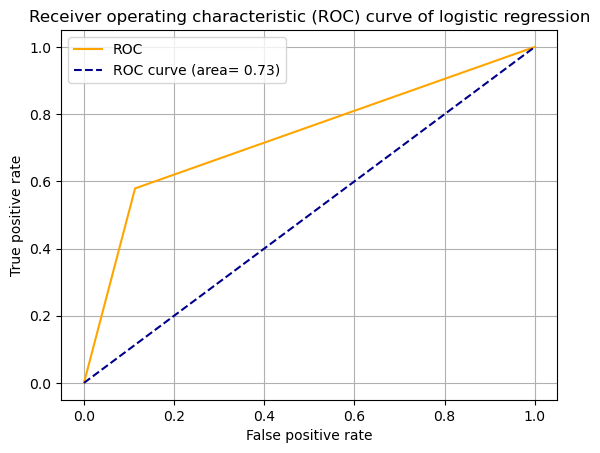

In [382]:
fpr,tpr, thresholds= roc_curve(y_test, lr_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle= '--', label= 'ROC curve (area= %0.2f)' % auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve of logistic regression')
plt.legend()
plt.grid()
plt.show()

Confussion matrix of 'KNN'

<Axes: >

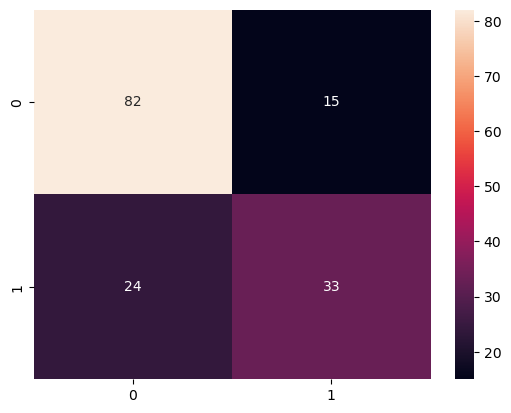

In [384]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt="d")


In [491]:
#making the confusion matrix of KNN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, knn_pred)

print('TN - True Negative {}', format(cm[0,0]))
print('FP - False Positive {}', format(cm[0,1]))
print('FN - False Negative {}', format(cm[1,0]))
print('TP - True Positive {}', format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0, 0], cm[1, 1]]), np.sum(cm)) * 100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0, 1], cm[1, 0]]), np.sum(cm)) * 100))


TN - True Negative {} 82
FP - False Positive {} 15
FN - False Negative {} 24
TP - True Positive {} 33
Accuracy Rate: 74.67532467532467
Misclassification Rate: 25.324675324675322


In [493]:
74.67532467532467+25.324675324675322

100.0

In [495]:
#classification report of KNN
print('Classification Report of KNN: \n', classification_report(y_test,knn_pred,digits=4))

Classification Report of KNN: 
               precision    recall  f1-score   support

           0     0.7736    0.8454    0.8079        97
           1     0.6875    0.5789    0.6286        57

    accuracy                         0.7468       154
   macro avg     0.7305    0.7122    0.7182       154
weighted avg     0.7417    0.7468    0.7415       154



Area under curve of KNN

auc= roc_auc_score(y_test, knn_pred)
print("ROC AUC SCORE of logistic regression is", auc)

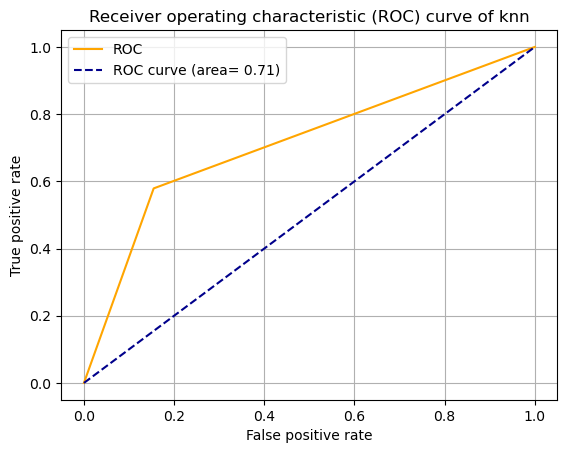

In [500]:
fpr,tpr, thresholds= roc_curve(y_test, knn_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle= '--', label= 'ROC curve (area= %0.2f)' % auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve of knn')
plt.legend()
plt.grid()
plt.show()

confusion matrix of Naive Bayes

In [503]:
#making the confusion matrix of naive bayes
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, nb_pred)

print('TN - True Negative {}', format(cm[0,0]))
print('FP - False Positive {}', format(cm[0,1]))
print('FN - False Negative {}', format(cm[1,0]))
print('TP - True Positive {}', format(cm[1,1]))
print('Accuracy Rate of naive bayes: {}'.format(np.divide(np.sum([cm[0, 0], cm[1, 1]]), np.sum(cm)) * 100))
print('Misclassification Rate of naive bayes: {}'.format(np.divide(np.sum([cm[0, 1], cm[1, 0]]), np.sum(cm)) * 100))

TN - True Negative {} 78
FP - False Positive {} 19
FN - False Negative {} 21
TP - True Positive {} 36
Accuracy Rate of naive bayes: 74.02597402597402
Misclassification Rate of naive bayes: 25.97402597402597


<Axes: >

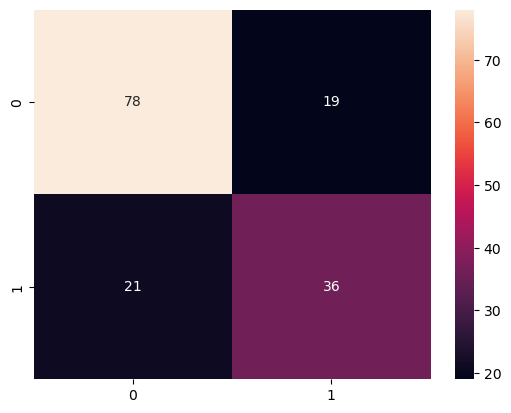

In [506]:
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt="d")

classification report of 'Naive bayes'

In [508]:
#classification report of KNN
print('Classification Report of Naive bayes: \n', classification_report(y_test,nb_pred,digits=4))

Classification Report of Naive bayes: 
               precision    recall  f1-score   support

           0     0.7879    0.8041    0.7959        97
           1     0.6545    0.6316    0.6429        57

    accuracy                         0.7403       154
   macro avg     0.7212    0.7179    0.7194       154
weighted avg     0.7385    0.7403    0.7393       154



Roc AUC score of Naive bayes

In [511]:
auc= roc_auc_score(y_test, knn_pred)
print("ROC AUC SCORE of logistic regression is", auc)

ROC AUC SCORE of logistic regression is 0.7121540965816603


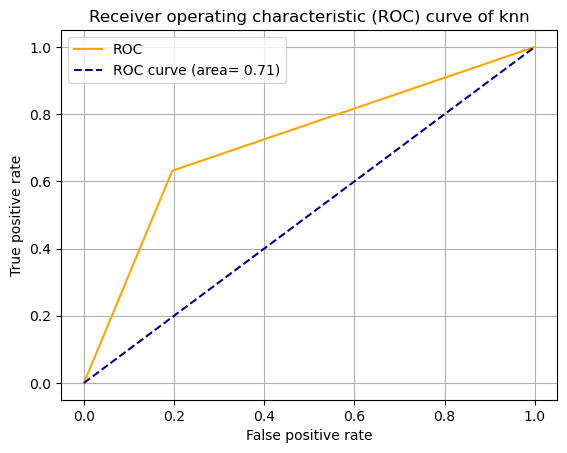

In [513]:
fpr,tpr, thresholds= roc_curve(y_test, nb_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle= '--', label= 'ROC curve (area= %0.2f)' % auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve of knn')
plt.legend()
plt.grid()
plt.show()

confussion matrix of 'SVM'

<Axes: >

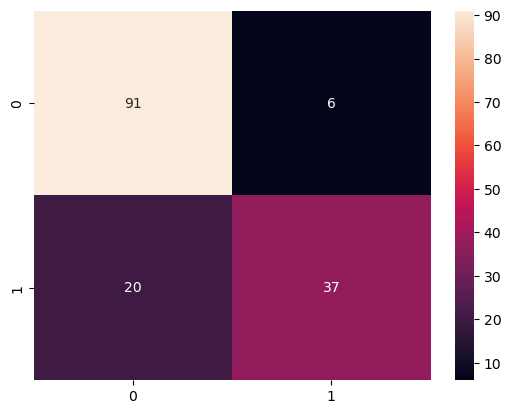

In [516]:
sns.heatmap(confusion_matrix(y_test,sv_pred), annot=True, fmt='d')

In [520]:
#making the confusion matrix of svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, sv_pred)

print('TN - True Negative {}', format(cm[0,0]))
print('FP - False Positive {}', format(cm[0,1]))
print('FN - False Negative {}', format(cm[1,0]))
print('TP - True Positive {}', format(cm[1,1]))
print('Accuracy Rate of svm: {}'.format(np.divide(np.sum([cm[0, 0], cm[1, 1]]), np.sum(cm)) * 100))
print('Misclassification Rate of svm: {}'.format(np.divide(np.sum([cm[0, 1], cm[1, 0]]), np.sum(cm)) * 100))

TN - True Negative {} 91
FP - False Positive {} 6
FN - False Negative {} 20
TP - True Positive {} 37
Accuracy Rate of svm: 83.11688311688312
Misclassification Rate of svm: 16.883116883116884


classification report of svm

In [525]:
print('Classification Report of svm: \n', classification_report(y_test,sv_pred,digits=4))


Classification Report of svm: 
               precision    recall  f1-score   support

           0     0.8198    0.9381    0.8750        97
           1     0.8605    0.6491    0.7400        57

    accuracy                         0.8312       154
   macro avg     0.8401    0.7936    0.8075       154
weighted avg     0.8349    0.8312    0.8250       154



ROC AUC of SVM

In [529]:
auc= round(roc_auc_score(y_test, sv_pred)*100,2)
print("ROC AUC SCORE of svm is", auc)

ROC AUC SCORE of svm is 79.36


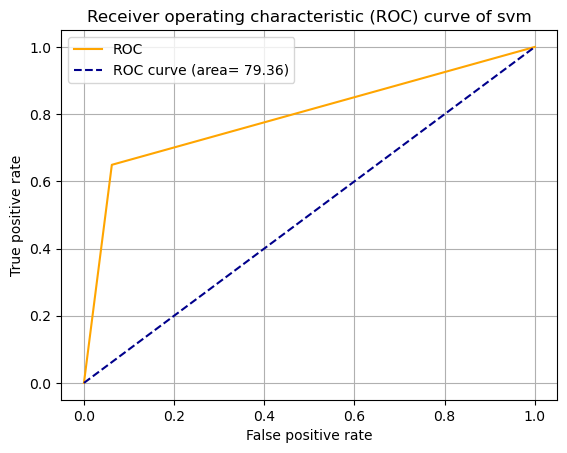

In [531]:
fpr,tpr, thresholds= roc_curve(y_test, sv_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle= '--', label= 'ROC curve (area= %0.2f)' % auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve of svm')
plt.legend()
plt.grid()
plt.show()